## Describing Distributions (Core)
Jacob Tanzi



## Analyzing & visualizing several features in the Medical Dataset.

### The features to analyze: 

* VitD_levels
* Doc_visits
* TotalCharge








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url, index_col = 0)
df.head()

,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
State,,,,,,,,,,,,,,,,,,,,,
AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, AL to ND
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 1000 non-null   float64
 1   Lng                 1000 non-null   float64
 2   Area                995 non-null    object 
 3   Children            993 non-null    float64
 4   Age                 1000 non-null   int64  
 5   Income              1000 non-null   float64
 6   Marital             995 non-null    object 
 7   Gender              995 non-null    object 
 8   ReAdmis             1000 non-null   int64  
 9   VitD_levels         1000 non-null   float64
 10  Doc_visits          1000 non-null   int64  
 11  Full_meals_eaten    1000 non-null   int64  
 12  vitD_supp           1000 non-null   int64  
 13  Soft_drink          1000 non-null   int64  
 14  Initial_admin       995 non-null    object 
 15  HighBlood           1000 non-null   int64  
 16  Stroke      

In [7]:
df['VitD_levels'].describe()

count    1000.000000
mean       17.992381
std         2.056366
min        11.475314
25%        16.620469
50%        18.020163
75%        19.418254
max        24.565463
Name: VitD_levels, dtype: float64

In [8]:
df['Doc_visits'].describe()

count    1000.000000
mean        4.992000
std         1.048349
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Doc_visits, dtype: float64

In [9]:
df['TotalCharge'].describe()

count    1000.000000
mean     3240.971613
std       600.413722
min      2022.650007
25%      2822.108670
50%      3164.679245
75%      3628.550654
max      5572.846022
Name: TotalCharge, dtype: float64

### For each feature listed:

* Plot a histogram with a kde (kernel density estimate)
* Add a line for the mean (red)
* Add a line for the median (green)
* Add a line for for +1 std from the mean (black)
* Add a line for the - 1 std from the mean (black)
* Highlight the range between +1 and =1 std (yellow)

In [17]:
def plot_histogram_stats(df, column_name):
    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x=column_name, kde=True)

    mean = df[column_name].mean()
    median = df[column_name].median()
    std = df[column_name].std()

    plt.axvline(mean, color='red', linestyle='dashed', label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', label='Median')
    plt.axvline(mean + std, color='black', linestyle='dotted', label='+1 Std')
    plt.axvline(mean - std, color='black', linestyle='dotted', label='-1 Std')

    plt.axvspan(mean - std, mean + std, color='yellow', alpha=0.3, label='+/- 1 Std Range')

    plt.legend()
    plt.xlabel(column_name)
    plt.ylabel('Probability')
    plt.title(f'Histogram with kernel density estimate for {column_name}')
    plt.show()

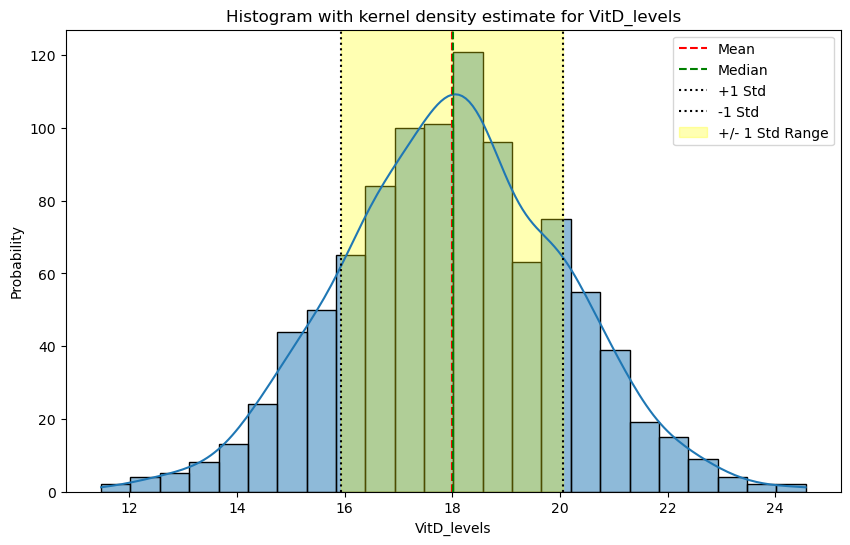

In [18]:
plot_histogram_stats(df, 'VitD_levels')


#### * Is it Discrete or Continuous?
 * Continuous

#### * Does it have a skew? If so, which direction (+/-)
 * no, normal no skew

#### * What type of kurtosis does it display? 
 * Mesokurtic

In [23]:
from scipy import stats
kurt_vit = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt_vit

3.013147515833447

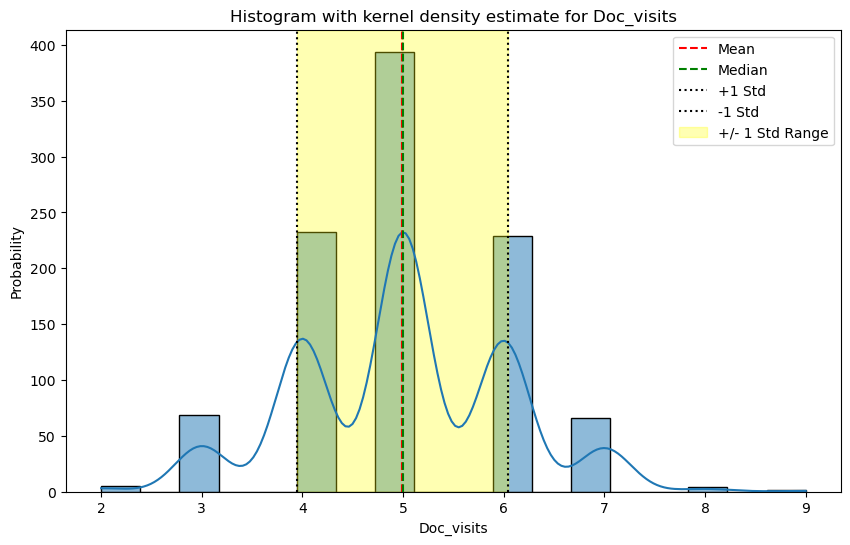

In [19]:
plot_histogram_stats(df, 'Doc_visits')

In [24]:
kurt_doc = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt_doc

2.9919958083381206


#### * Is it Discrete or Continuous?
 * Discrete, whole numbers 

#### * Does it have a skew? If so, which direction (+/-)
 * no, normal no skew

#### * What type of kurtosis does it display? 
 * Mesokurtic

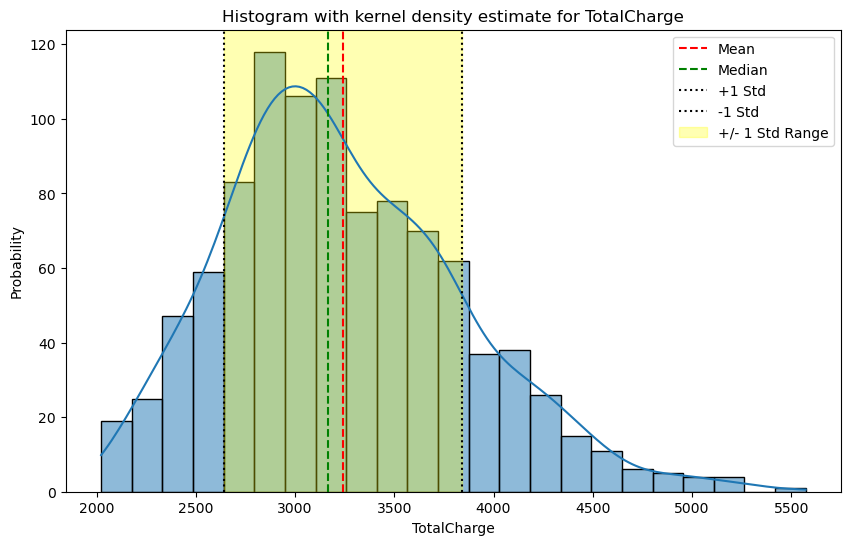

In [20]:
plot_histogram_stats(df, 'TotalCharge')

In [25]:
kurt_cha = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt_cha

3.2650077463439384

#### * Is it Discrete or Continuous?
 * Continuous

#### * Does it have a skew? If so, which direction (+/-)
 * yes, positive skew

#### * What type of kurtosis does it display? 
 * Leptokurtic